In [51]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
import pickle
import json
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Data Exploration

In [2]:
# Import data
data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/DarkNet.csv')

/var/folders/24/zglgqpr53l7_qk7br0pmq3c40000gq/T/ipykernel_4659/325394873.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/DarkNet.csv')


In [3]:
# Explore Dataframe
data.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,68580.000000,68580.000000,68580.000000,6.858000e+04,68580.000000,68580.000000,6.858000e+04,6.858000e+04,68580.000000,68580.000000,...,68580.000000,68580.000000,68580.0,68580.0,68580.0,68580.0,6.858000e+04,6.858000e+04,6.858000e+04,6.858000e+04
mean,39726.052041,14235.135200,10.978798,2.405470e+07,291.265777,284.729513,2.286576e+05,2.418586e+05,229.046165,18.948936,...,188.358399,15.521260,0.0,0.0,0.0,0.0,6.294694e+14,4.875483e+13,6.540864e+14,5.407995e+14
std,19362.966799,20255.302047,5.577292,4.049607e+07,3399.455076,4873.361494,4.667583e+06,6.522065e+06,846.294647,36.286681,...,2260.533013,8.088541,0.0,0.0,0.0,0.0,6.984537e+14,1.820131e+14,7.179893e+14,6.981754e+14
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,32898.000000,80.000000,6.000000,1.225882e+05,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,8.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,45126.000000,4644.000000,6.000000,4.201030e+05,2.000000,1.000000,4.400000e+01,0.000000e+00,33.000000,0.000000,...,1.000000,20.000000,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,54712.000000,28326.000000,17.000000,2.716053e+07,5.000000,3.000000,3.360000e+02,2.180000e+02,108.000000,33.000000,...,2.000000,20.000000,0.0,0.0,0.0,0.0,1.433530e+15,1.807551e+07,1.437150e+15,1.433530e+15
max,65534.000000,65533.000000,17.000000,1.200000e+08,238161.000000,470862.000000,7.693074e+08,6.704287e+08,64240.000000,1350.000000,...,113325.000000,44.000000,0.0,0.0,0.0,0.0,1.460000e+15,1.030000e+15,1.460000e+15,1.460000e+15


In [4]:
# Find types of colunms
column_types = data.columns
print(column_types.to_list())

['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Total_Fwd_Packet', 'Total_Bwd_packets', 'Total_Length_of_Fwd_Packet', 'Total_Length_of_Bwd_Packet', 'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length', 'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s', 'Packet_Length_Min', 'Packet_Length_Max', 'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count', 'SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count', 'URG_Flag_Count', 'CWE_

In [5]:
# Find rows that include infinite values
inf_locations = data[data.replace([np.inf, -np.inf], np.nan).isna().any(axis=1)]
inf_locations

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label-1,Label-2
564,130.89.21.195,33051,10.152.152.11,40958,6,0,1,1,0,0,...,0,0,0,0,0,0.0,0,0,Non-Tor,AUDIO-STREAMING
594,151.249.131.19,16035,10.152.152.11,43611,6,0,1,1,0,0,...,0,0,0,0,0,0.0,0,0,Non-Tor,AUDIO-STREAMING
664,31.13.100.97,3478,10.152.152.11,35031,6,0,2,0,0,0,...,0,0,0,0,0,0.0,0,0,Non-Tor,AUDIO-STREAMING
665,31.13.100.97,443,10.152.152.11,48673,6,0,2,0,0,0,...,0,0,0,0,0,0.0,0,0,Non-Tor,AUDIO-STREAMING
878,10.152.152.10,9052,10.152.152.11,40215,6,0,1,1,0,0,...,0,0,0,0,0,0.0,0,0,Non-Tor,AUDIO-STREAMING
882,95.100.255.152,443,10.152.152.11,60069,6,0,1,1,0,0,...,0,0,0,0,0,0.0,0,0,Non-Tor,AUDIO-STREAMING
912,95.100.255.152,443,10.152.152.11,60073,6,0,1,1,0,0,...,0,0,0,0,0,0.0,0,0,Non-Tor,AUDIO-STREAMING
937,10.152.152.10,9052,10.152.152.11,40204,6,0,1,1,0,0,...,0,0,0,0,0,0.0,0,0,Non-Tor,AUDIO-STREAMING
994,10.152.152.10,9052,10.152.152.11,40214,6,0,1,1,0,0,...,0,0,0,0,0,0.0,0,0,Non-Tor,AUDIO-STREAMING
1340,64.233.186.94,443,10.152.152.11,42865,6,0,1,1,0,0,...,0,0,0,0,0,0.0,0,0,Non-Tor,AUDIO-STREAMING


In [6]:
# Remove rows that include infinite values and/or NaN values
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [7]:
# Remove non-essential columns
data = data.drop(['Src_Port', 'Dst_Port', 'Dst_IP', 'Dst_Port', 'Src_IP', 'Protocol'], axis=1)

In [12]:
# Check for missing values in the DataFrame
print(data.isnull().sum().to_dict())

{'Flow_Duration': 0, 'Total_Fwd_Packet': 0, 'Total_Bwd_packets': 0, 'Total_Length_of_Fwd_Packet': 0, 'Total_Length_of_Bwd_Packet': 0, 'Fwd_Packet_Length_Max': 0, 'Fwd_Packet_Length_Min': 0, 'Fwd_Packet_Length_Mean': 0, 'Fwd_Packet_Length_Std': 0, 'Bwd_Packet_Length_Max': 0, 'Bwd_Packet_Length_Min': 0, 'Bwd_Packet_Length_Mean': 0, 'Bwd_Packet_Length_Std': 0, 'Flow_Bytes/s': 0, 'Flow_Packets/s': 0, 'Flow_IAT_Mean': 0, 'Flow_IAT_Std': 0, 'Flow_IAT_Max': 0, 'Flow_IAT_Min': 0, 'Fwd_IAT_Total': 0, 'Fwd_IAT_Mean': 0, 'Fwd_IAT_Std': 0, 'Fwd_IAT_Max': 0, 'Fwd_IAT_Min': 0, 'Bwd_IAT_Total': 0, 'Bwd_IAT_Mean': 0, 'Bwd_IAT_Std': 0, 'Bwd_IAT_Max': 0, 'Bwd_IAT_Min': 0, 'Fwd_PSH_Flags': 0, 'Bwd_PSH_Flags': 0, 'Fwd_URG_Flags': 0, 'Bwd_URG_Flags': 0, 'Fwd_Header_Length': 0, 'Bwd_Header_Length': 0, 'Fwd_Packets/s': 0, 'Bwd_Packets/s': 0, 'Packet_Length_Min': 0, 'Packet_Length_Max': 0, 'Packet_Length_Mean': 0, 'Packet_Length_Std': 0, 'Packet_Length_Variance': 0, 'FIN_Flag_Count': 0, 'SYN_Flag_Count': 0, '

In [23]:
# Handle missing values

# In this scenario we have no missing values, after our initial pre-processing
# However we show here the code that would fill in the missing values, just for future reference

# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

# Create transformers
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

data_imputed = preprocessor.fit_transform(data)

In [27]:
# Shuffle Data
data = data.sample(frac=1).reset_index(drop=True)

In [26]:
# Get the correlation matrix of the DataFrame
print(data.corr())

/var/folders/24/zglgqpr53l7_qk7br0pmq3c40000gq/T/ipykernel_4659/2841956560.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


                            Flow_Duration  Total_Fwd_Packet  \
Flow_Duration                    1.000000          0.172288   
Total_Fwd_Packet                 0.172288          1.000000   
Total_Bwd_packets                0.116931          0.743930   
Total_Length_of_Fwd_Packet       0.092396          0.457568   
Total_Length_of_Bwd_Packet       0.065298          0.635642   
...                                   ...               ...   
Active_Min                            NaN               NaN   
Idle_Mean                        0.610370          0.098781   
Idle_Std                         0.174666         -0.022527   
Idle_Max                         0.616174          0.093186   
Idle_Min                         0.529074          0.108879   

                            Total_Bwd_packets  Total_Length_of_Fwd_Packet  \
Flow_Duration                        0.116931                    0.092396   
Total_Fwd_Packet                     0.743930                    0.457568   
Total_Bwd_pa

# Data Deduplication

In [28]:
# Separate features and labels
X = data_imputed[:, :-2]    # Assuming last two columns are labels
label_1 = data_imputed[:, -2]
label_2 = data_imputed[:, -1]

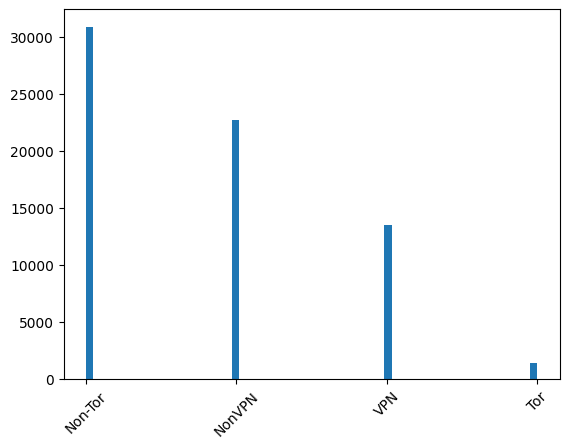

In [29]:
plt.hist(label_1, bins='auto')  # 'auto' automatically determines the number of bins
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

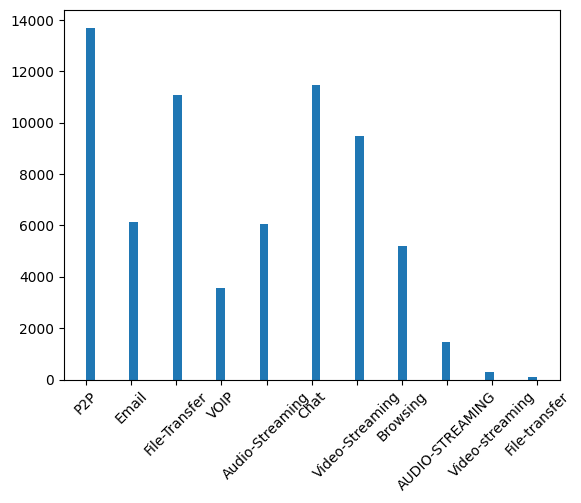

In [30]:
plt.hist(label_2, bins='auto')  # 'auto' automatically determines the number of bins
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

In [31]:
# Values of the label-2 were duplicates, but masked because of capital letters.

label_2 = np.array(label_2, dtype=str)
label_2 = np.char.lower(label_2)
np.unique(label_2)

array(['audio-streaming', 'browsing', 'chat', 'email', 'file-transfer',
       'p2p', 'video-streaming', 'voip'], dtype='<U15')

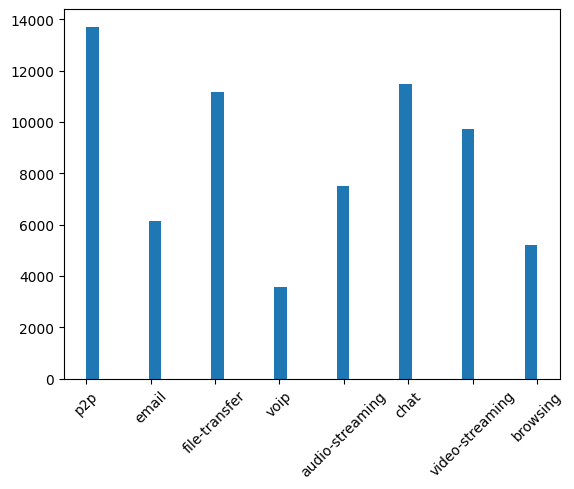

In [32]:
plt.hist(label_2, bins='auto')  # 'auto' automatically determines the number of bins
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

In [33]:
# Encode labels
le1 = LabelEncoder()
label_1_encoded = le1.fit_transform(label_1)

le2 = LabelEncoder()
label_2_encoded = le2.fit_transform(label_2)

# Get correspondence
label_1_correspondence = dict(zip(le1.classes_, le1.transform(le1.classes_)))
label_2_correspondence = dict(zip(le2.classes_, le2.transform(le2.classes_)))

In [34]:
print(label_1_correspondence)

{'Non-Tor': 0, 'NonVPN': 1, 'Tor': 2, 'VPN': 3}


Given that the data is related to an organization, the definition of normal traffic can be adjusted to reflect typical business activities. In a corporate environment, certain types of traffic are more expected and thus can be classified as normal.

Normal Traffic: In an organizational context, non-Tor and no-VPN traffic are more likely to be normal. Tor usage is uncommon in business settings and might indicate attempts to hide activities. VPN usage can be normal if the organization supports remote work, but excessive or unauthorized VPN usage could be anomalous.
Normal: Non-tor, no-vpn, VPN (authorized usage)
Anomalous: Tor, VPN (unauthorized usage)

Normal Traffic: Typical business activities would include email, browsing, chat, VOIP, and sometimes file transfer (for legitimate work-related purposes). Streaming (both audio and video) might be less common but can still occur in a corporate environment for work purposes (e.g., webinars, training sessions).
Normal: Browsing, Email, Chat, VOIP, File-Transfer (for work purposes), Video-Streaming (work-related), Audio-Streaming (work-related)
Anomalous: P2P, File-Transfer (large volumes or unusual patterns), Audio-Streaming (non-work-related), Video-Streaming (non-work-related)

At the same time, we can look at their distributions and conclude on which are more common (typical) in the organisation, and which ones not.

# Data Scaling/ Normalization

In [35]:
# Normalize the data
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


# Feature Selection

In [36]:
# Create a pandas DataFrame from the numpy array
X_scaled_df = pd.DataFrame(X_scaled)

In [39]:
# Dimensionality Redcution

# Apply PCA
pca = PCA(n_components=10)  # Adjust the number of components based on explained variance
principalComponents = pca.fit_transform(X_scaled_df)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=[f'PC{i+1}' for i in range(principalComponents.shape[1])])

# Combine with the labels
finalDf = pd.concat([principalDf, data[['Label-1', 'Label-2']]], axis=1)

print(finalDf.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.545164  0.548846  0.347869 -0.012940 -0.971303  0.087645  1.058741   
1 -2.228999  0.879000  0.075644 -0.058556  0.862211 -0.101194 -0.446867   
2 -2.350163  0.782370  0.230975  0.242474  0.995513 -0.188614 -0.536229   
3  1.880119 -1.637957  0.333226  2.471296  2.418860 -0.759853 -1.408261   
4 -2.649452  0.608423  0.510879  0.475228  0.540547 -0.256854 -0.066099   

        PC8       PC9      PC10  Label-1 Label-2  
0  0.361487 -0.289083  1.141032  Non-Tor     P2P  
1  0.802645 -0.241901  0.059795      VPN    Chat  
2  0.599521 -0.030951 -0.008056  Non-Tor     P2P  
3 -0.831606  2.755825 -0.592691   NonVPN   Email  
4  0.352011  0.133853  0.669858   NonVPN    Chat  


In [40]:
# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Optionally, create a DataFrame to view the eigenvalues along with their explained variance ratio
eigen_df = pd.DataFrame({
    'Principal Component': [f'PC{i}' for i in range(1, len(eigenvalues) + 1)],
    'Eigenvalue': eigenvalues,
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

print(eigen_df)

  Principal Component  Eigenvalue  Explained Variance Ratio
0                 PC1   12.440064                  0.203932
1                 PC2    8.611223                  0.141166
2                 PC3    5.569986                  0.091310
3                 PC4    4.360161                  0.071477
4                 PC5    3.619276                  0.059332
5                 PC6    2.788365                  0.045710
6                 PC7    2.182973                  0.035786
7                 PC8    2.083029                  0.034148
8                 PC9    1.966617                  0.032239
9                PC10    1.761018                  0.028869


# Data Splitting

In [41]:
# Splitting the data into training (80%), and test (20%) sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(principalDf.to_numpy(), label_1_encoded, label_2_encoded, test_size=0.2, random_state=42) # X

# Data Scaling/ Normalization

In [42]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on the training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Define and Train Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid, used for hypermeter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y1_train)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Train the final model with the best parameters
best_rf = grid_search.best_estimator_

In [44]:
print('Best Parameters: ', best_params)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [45]:
# Save trained best model

with open('models/final-excercise-classification/best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

# Test the model

In [52]:
# Predict on the test set
y_test_pred = best_rf.predict(X_test)
print("Test Set Performance")
print(classification_report(y1_test, y_test_pred))
print(confusion_matrix(y1_test, y_test_pred))

Test Set Performance
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6203
           1       0.92      0.94      0.93      4496
           2       0.93      0.88      0.90       289
           3       0.92      0.87      0.90      2719

    accuracy                           0.95     13707
   macro avg       0.94      0.92      0.93     13707
weighted avg       0.95      0.95      0.95     13707

[[6161   26    1   15]
 [  74 4229   17  176]
 [   2   29  254    4]
 [  63  291    2 2363]]


# Visualizations

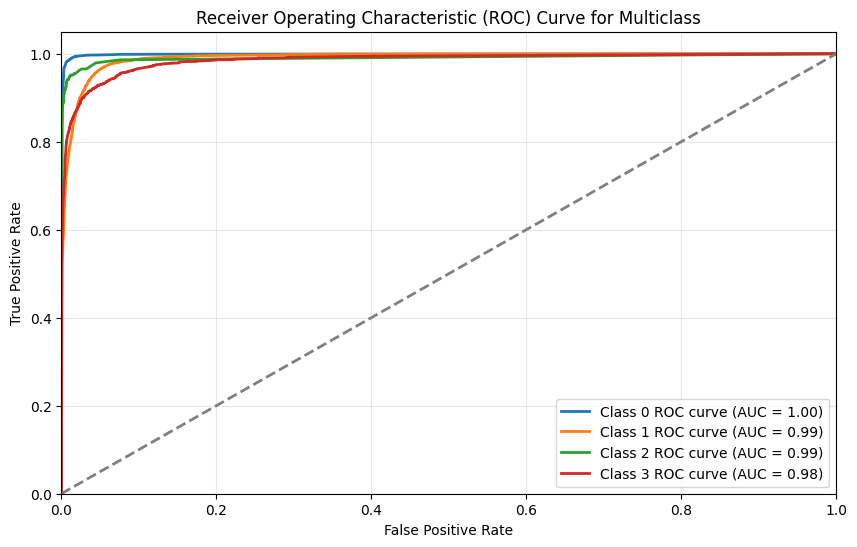

In [53]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the labels for multiclass classification
y_test_bin = label_binarize(y1_test, classes=[0, 1, 2, 3])

# Compute predicted probabilities for the validation and test sets
y_test_prob = best_rf.predict_proba(X_test)

# Compute ROC curve and AUC for the test set
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()
for i in range(4):  # Assuming you have 4 classes
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])  # Index y_test_prob by class
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plotting the ROC curves
plt.figure(figsize=(10, 6))

for i in range(4):  # Assuming you have 4 classes
    plt.plot(fpr_test[i], tpr_test[i], lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc_test[i]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')  # Diagonal line

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
